In [1]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker('pl_PL')
Faker.seed(0)
np.random.seed(0)
random.seed(0)

T0_date = datetime.strptime('2015-01-01', '%Y-%m-%d').date() 
T1_date = datetime.strptime('2020-01-01', '%Y-%m-%d').date() 
T2_date = datetime.strptime('2025-01-01', '%Y-%m-%d').date()  

#To generate 1 milion houses, wit buying and selling set it to 
#SCALE = 10
SCALE = 2000

In [2]:
def push_to_file(file_name, data):
    with open(file_name, 'w') as file:
        for row in data:
            line = '|'.join(str(value) for value in row)
            file.write(line + '\n')

In [3]:
NUM_PEOPLE_T1 = 20 * SCALE 
NUM_PEOPLE_T2 = 40 * SCALE

def write_person(file, PersonID, name, surname, phone_number, emai, addres):
    line = f"{PersonID}|{name}|{surname}|{phone_number}|{emai}|{addres}\n"
    file.write(line)


with open('T1_person.bulk', 'w') as t1_file, open('T2_person.bulk', 'w') as t2_file:
    for i in range(NUM_PEOPLE_T2):
        id = i+ 1
        name = fake.first_name()
        surname = fake.last_name()
        phone_number = str(random.randint(100000000, 999999999))
        email = fake.email()
        address = fake.address().replace('\n', ', ')

        if i < NUM_PEOPLE_T1:
            write_person(t1_file,
                            id,
                            name,
                            surname,
                            phone_number,
                            email,
                            address)
        write_person(t2_file,
                        id,
                        name,
                        surname,
                        phone_number,
                        email,
                        address)


In [4]:
NUM_EMPLOYEES_T1 = int(NUM_PEOPLE_T1 / 5)
NUM_EMPLOYEES_T2 = int(NUM_PEOPLE_T2 / 5)

NUM_OF_CLIENTS_AT_THAT_TIME = 0

#employees = []
salesman_t1 = []
salesman_t2 = []

def write_employee(file, employee_id, person_id, title, salary):
    line = f"{employee_id}|{person_id}|{title}|{salary}\n"
    file.write(line)

with open('T1_employees.bulk', 'w') as t1_file, open('T2_employees.bulk', 'w') as t2_file:
    for i in range(NUM_EMPLOYEES_T2):
        if NUM_EMPLOYEES_T1 == i :
            NUM_OF_CLIENTS_AT_THAT_TIME = NUM_PEOPLE_T1 - NUM_EMPLOYEES_T1

        EmployeeID = i + 1 
        PersonID = i + 1 + NUM_OF_CLIENTS_AT_THAT_TIME
        title = random.choice(['Salesman', 'Manager', 'HR', 'Accountant', 'IT'])
        salary = round(random.uniform(30000, 80000))

        if i == 0:
            title = 'Salesman'
        
        if title == 'Salesman':
            if i < NUM_EMPLOYEES_T1:
                salesman_t1.append(EmployeeID)
            
            salesman_t2.append(EmployeeID)

        if i < NUM_EMPLOYEES_T1:
            write_employee(t1_file, EmployeeID, PersonID, title, salary)

        write_employee(t2_file, EmployeeID, PersonID, title, salary)


In [5]:
print(salesman_t2)

[1, 3, 6, 9, 24, 28, 46, 49, 50, 53, 56, 57, 59, 64, 65, 66, 81, 88, 97, 103, 109, 112, 124, 126, 131, 148, 154, 155, 177, 184, 187, 189, 195, 208, 210, 213, 217, 219, 228, 231, 234, 235, 243, 252, 259, 262, 263, 272, 273, 277, 286, 293, 294, 299, 305, 306, 309, 313, 325, 326, 339, 343, 351, 354, 357, 359, 362, 365, 367, 372, 377, 386, 396, 410, 411, 412, 422, 432, 435, 438, 443, 456, 457, 465, 469, 472, 475, 480, 481, 490, 491, 497, 504, 506, 519, 520, 526, 527, 528, 534, 536, 537, 539, 544, 547, 554, 560, 568, 576, 578, 588, 594, 595, 605, 606, 608, 609, 615, 619, 627, 628, 629, 630, 641, 645, 655, 659, 665, 673, 675, 677, 679, 687, 690, 705, 707, 709, 710, 711, 717, 722, 723, 730, 733, 756, 757, 763, 768, 778, 788, 793, 794, 800, 810, 819, 837, 839, 843, 844, 845, 866, 868, 869, 870, 871, 884, 899, 902, 905, 914, 915, 917, 920, 933, 936, 938, 951, 960, 962, 963, 965, 967, 977, 983, 988, 996, 999, 1000, 1001, 1006, 1008, 1022, 1023, 1029, 1038, 1074, 1084, 1085, 1095, 1104, 1108, 110

In [6]:
NUM_PROPERTIES_T1 = 100 * SCALE
NUM_PROPERTIES_T2 = 200 * SCALE
price_list = []
amenities_list = [
    "WiFi", "Parking", "Balcony", "Garden", "Air Conditioning", 
    "Heating", "Fireplace", "Swimming Pool", "Dishwasher", 
    "Washer", "Dryer", "Elevator", "Gym", "Pet Friendly"
]

def write_property(file, PropertyID, Ammentities, Address, Dsitrict, size, Type, price):
    line = f"{PropertyID}|{Ammentities}|{Address}|{Dsitrict}|{size}|{Type}|{price}\n"
    file.write(line)

with open('T1_property.bulk', 'w') as t1_file, open('T2_property.bulk', 'w') as t2_file:
    for i in range(NUM_PROPERTIES_T2):
        price = round(random.uniform(100000, 1500000))
        price_list.append(price)
        PropertyID = i + 1
        ammenities = ', '.join(random.sample(amenities_list, k=random.randint(3, 6)))
        address = fake.address().replace('\n', ', ')
        type = random.choice(['House', 'Apartment', 'studio', 'Villa', 'penthouse'])
        size = random.randint(30, 300)
        district = random.choice(['North', 'South', 'East', 'West'])
        if i < NUM_PROPERTIES_T1:
            write_property(t1_file,
                           PropertyID,
                           ammenities,
                            address,
                            district,
                            type,
                            size,
                            price)

        write_property(t2_file,
                           PropertyID,
                           ammenities,
                            address,
                            district,
                            type,
                            size,
                            price)


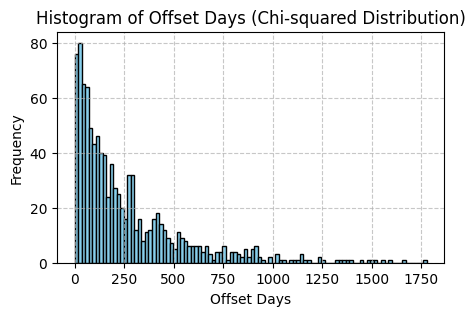

In [7]:
import matplotlib.pyplot as plt

starting_period = T0_date
ending_period = T1_date - timedelta(days=1)

df = 3 
num_simulations = 1000
offsets = []

for _ in range(num_simulations):
    buy_date = fake.date_between(start_date=starting_period, end_date=ending_period)
    date_range_days = (ending_period - buy_date).days

    if date_range_days <= 0:
        offsets.append(0)
        continue
    
    chi2_sample = min(np.random.chisquare(df) / 10, 1.0)
    offset_days = int(chi2_sample * date_range_days)
    offsets.append(offset_days)

# Plot histogram
plt.figure(figsize=(5, 3))
plt.hist(offsets, bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Offset Days (Chi-squared Distribution)')
plt.xlabel('Offset Days')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
del offsets

In [8]:

import os

for file in ['T1_marketing.bulk', 'T2_marketing.bulk']:
    if os.path.exists(file):
        os.remove(file)


Methods_used_to_market = [
    "Video", "Photos", "Social Media", "Email Marketing", "SEO", 
    "Content Marketing", "Influencer Marketing", "Paid Ads", 
    "SMS Marketing"
]


def Write_marketing(file, PropertyID, Money_Marketing, Views_Our_Website, Views_Competition_Website, Money_Competition_Website, Views_Social_Media, Money_Social_Media, Starting_date, Ending_date, Methods):
    line = f"{PropertyID}|{round(Money_Marketing)}|{round(Views_Our_Website)}|{round(Views_Competition_Website)}|{round(Money_Competition_Website)}|{round(Views_Social_Media)}|{round(Money_Social_Media)}|{Starting_date}|{Ending_date}|{Methods}\n"
    file.write(line)


def Write_marketing_cases(PropertyID, Money_Marketing, Views_Our_Website, Views_Competition_Website, Money_Competition_Website, Views_Social_Media, Money_Social_Media, Starting_date, Ending_date, Methods):
     with open('T1_marketing.bulk', 'a') as t1_file, open('T2_marketing.bulk', 'a') as t2_file:
        if ending_period < T1_date:
            Write_marketing(t1_file, PropertyID, Money_Marketing, Views_Our_Website, Views_Competition_Website, Money_Competition_Website, Views_Social_Media, Money_Social_Media, Starting_date, Ending_date, Methods)
        
        Write_marketing(t2_file, PropertyID, Money_Marketing, Views_Our_Website, Views_Competition_Website, Money_Competition_Website, Views_Social_Media, Money_Social_Media, Starting_date, Ending_date, Methods)
        

          

def Generate_Marketing_data(PropertyID, buy_date, sale_date):
    if sale_date < T2_date:
        Views_Our_Website = round(random.uniform(1000, 10000))
        Views_Competition_Website = round(random.uniform(1000, 50000))
        Money_Competition_Website = round(Views_Competition_Website * random.uniform(0.005, 0.05), 2)
        Views_Social_Media = round(random.uniform(10, 75000))
        Money_Social_Media = round(Views_Social_Media * random.uniform(0.0001, 0.05), 2)
        Starting_date = buy_date + timedelta(days=random.randint(1, 3))
        Ending_date = sale_date - timedelta(days=random.randint(2, 10))
        Methods = ', '.join(random.sample(Methods_used_to_market, k=random.randint(3, 6))),
        Money_Marketing = Money_Competition_Website + Money_Social_Media

        if Starting_date >= sale_date or Starting_date >= Ending_date or buy_date >= Ending_date:
            Write_marketing_cases(PropertyID, 0, Views_Our_Website, 0, 0, 0, 0, 0, 0, 0)
            # 0 means that no marketing was than and we promoted it only through our website
        else:
            Write_marketing_cases(PropertyID, Money_Marketing, Views_Our_Website, Views_Competition_Website, Money_Competition_Website, Views_Social_Media, Money_Social_Media, Starting_date, Ending_date, Methods)

In [9]:
NUM_OF_ACQUISITIONS_T1 = NUM_PROPERTIES_T1
NUM_OF_ACQUISITIONS_T2 = NUM_PROPERTIES_T2

acq = []
sale_t1 = []
sale_t2 = []
saleID = 1
starting_period = T0_date
ending_period = T1_date - timedelta(days=1)

employee_cout = NUM_EMPLOYEES_T1
people_count = NUM_PEOPLE_T1

range1 = range(NUM_EMPLOYEES_T1 + 1, NUM_PEOPLE_T1)  # inclusive
range2 = range(NUM_PEOPLE_T1 + (NUM_EMPLOYEES_T2 - NUM_EMPLOYEES_T1) + 1, NUM_PEOPLE_T2)  # inclusive
combined_ranges = list(range1)


with open('T1_acquisitions.bulk', 'w') as t1_acq_file, open('T2_acquisitions.bulk', 'w') as t2_acq_file:
    with open('T1_sale.bulk', 'w') as t1_sale_file, open('T2_sale.bulk', 'w') as t2_sale_file:
        
        def write_sale_or_acq(file, ID, PropertyID, FK_Person, FK_Employee, AgreedPrice, Date):
            line = f"{ID}|{PropertyID}|{FK_Person}|{FK_Employee}|{AgreedPrice}|{Date}\n"
            file.write(line)

        def save_sale(case, PropertyID, FK_Person, FK_Employee, SalePrice, SaleDate):
            global saleID
            
            if case == 1:
                write_sale_or_acq(t1_sale_file, saleID, PropertyID, FK_Person, FK_Employee, SalePrice, SaleDate)
            elif case == 2:
                write_sale_or_acq(t2_sale_file, saleID, PropertyID, FK_Person, FK_Employee, SalePrice, SaleDate)
                saleID += 1
            elif case == 3:
                save_sale(1, PropertyID, FK_Person, FK_Employee, SalePrice, SaleDate)
                save_sale(2, PropertyID, FK_Person, FK_Employee, SalePrice, SaleDate)


        for i in range(NUM_OF_ACQUISITIONS_T2):
            if i == NUM_OF_ACQUISITIONS_T1:
                starting_period = T1_date
                ending_period = T2_date - timedelta(days=1)
                employee_cout = NUM_EMPLOYEES_T2
                people_count = NUM_PEOPLE_T2
                combined_ranges = list(range1) + list(range2)
                
            buy_date = fake.date_between(start_date=starting_period, end_date=ending_period)

            Buying_price = round(price_list[i] * random.uniform(0.7, 1.05))
            PropertyID = i+1
            FK_Person_buying = random.choice(combined_ranges)
            FK_Employee = None

            if i < NUM_OF_ACQUISITIONS_T1:
                FK_Employee = random.choice(salesman_t1)
            else:
                FK_Employee = random.choice(salesman_t2)

            BuyingID = i + 1
            if i < NUM_OF_ACQUISITIONS_T1:
                write_sale_or_acq(t1_acq_file, BuyingID , PropertyID, FK_Person_buying, FK_Employee, Buying_price, buy_date)  

            write_sale_or_acq(t2_acq_file, BuyingID , PropertyID, FK_Person_buying, FK_Employee, Buying_price, buy_date)  

            offset_days = int(chi2_sample * date_range_days)
            sale_date = buy_date + timedelta(days=offset_days)
            sale_price = round(price_list[i] * float(random.uniform(0.95, 1.2)))

            FK_Person_selling = random.choice(combined_ranges)
            if i < NUM_OF_ACQUISITIONS_T1:
                FK_Employee = random.choice(salesman_t1)
            else:
                FK_Employee = random.choice(salesman_t2)
                
            if sale_date < T1_date:
                save_sale(3, PropertyID, FK_Person_selling, FK_Employee, sale_price, sale_date)
            elif sale_date < T2_date:
                save_sale(2, PropertyID, FK_Person_selling, FK_Employee, sale_price, sale_date)

            Generate_Marketing_data(PropertyID, buy_date, sale_date)
            


In [10]:
from openpyxl import Workbook, load_workbook

def bulk_to_excel(bulk_file, excel_file):
    if os.path.exists(excel_file):
        os.remove(excel_file)
        print(f"Deleted existing file: {excel_file}")

    try:
        wb = load_workbook(excel_file)
        ws = wb.active
    except FileNotFoundError:
        wb = Workbook()
        ws = wb.active
        headers = [ 'Property ID', 
                    'Money Spent on Marketing',
                    'Number of Views on Our Website',
                    'Number of Views on Competition Website',
                    'Money Spent on Competition Website',
                    'Number of Views on Social Media',
                    'Money Spent on Social Media',
                    'Starting date of the campaign', 
                    'Ending date of the campaign', 
                    'Methods used to market'
                  ]
        ws.append(headers)  

    with open(bulk_file, 'r') as f:
        for line in f:
            data = line.strip().split('|')
            ws.append(data)

    wb.save(excel_file)
    print(f"Successfully copied data from {bulk_file} to {excel_file}")

bulk_to_excel('T1_marketing.bulk', 'marketing_data_t1.xlsx')
bulk_to_excel('T2_marketing.bulk', 'marketing_data_t2.xlsx')


Successfully copied data from T1_marketing.bulk to marketing_data_t1.xlsx
Successfully copied data from T2_marketing.bulk to marketing_data_t2.xlsx


In [11]:
def increase_salary_for_n(file_path, n, increase_amount):
    modified_lines = []
    
    with open(file_path, 'r') as file:
        lines = lines = file.readlines()
        
        file.readlines()

    for i, line in enumerate(lines):
        columns = line.strip().split('|')
        
        if i < n and len(columns) > 5:  
            columns[6] = str(int(columns[6]) + increase_amount)

        modified_lines.append('|'.join(columns))

    with open(file_path, 'w') as file:
        file.writelines("\n".join(modified_lines) + '\n')

    print(f"Updated salaries for first {n} employees in {file_path}")


increase_salary_for_n('T2_property.bulk', SCALE * 50, 200000)


Updated salaries for first 100000 employees in T2_property.bulk


In [12]:
from datetime import date

# Manually defined Easter Monday and Corpus Christi dates from 2015 to 2025
easter_monday = {
    2015: "2015-04-06", 2016: "2016-03-28", 2017: "2017-04-17", 2018: "2018-04-02",
    2019: "2019-04-22", 2020: "2020-04-13", 2021: "2021-04-05", 2022: "2022-04-18",
    2023: "2023-04-10", 2024: "2024-04-01", 2025: "2025-04-21"
}
corpus_christi = {
    2015: "2015-06-04", 2016: "2016-05-26", 2017: "2017-06-15", 2018: "2018-05-31",
    2019: "2019-06-20", 2020: "2020-06-11", 2021: "2021-06-03", 2022: "2022-06-16",
    2023: "2023-06-08", 2024: "2024-05-30", 2025: "2025-06-19"
}

# Static holidays
static_holidays = [
    ("01-06", "The Epiphany", 1),
    ("01-21", "Grandmother’s day", 0),
    ("01-22", "Grandfather’s day", 0),
    ("05-01", "Labour Day", 1),
    ("05-03", "Constitution Day", 1),
    ("11-11", "Independence Day", 1),
    ("12-25", "Christmas", 1)
]

# Generate insert statements
inserts = []
for year in range(2015, 2026):
    # Static holidays
    for md, name, bank in static_holidays:
        inserts.append(
            f"insert into holidays (\"date\", \"holiday\", \"bank_holiday\") values ('{year}-{md}', '{name}', {bank});"
        )
    # Easter Monday
    inserts.append(
        f"insert into holidays (\"date\", \"holiday\", \"bank_holiday\") values ('{easter_monday[year]}', 'Easter Monday', 1);"
    )
    # Corpus Christi
    inserts.append(
        f"insert into holidays (\"date\", \"holiday\", \"bank_holiday\") values ('{corpus_christi[year]}', 'Corpus Christi', 1);"
    )

# Combine all into a single string
insert_sql = "\n".join(inserts)
insert_sql[:2000]  # Preview first 2000 characters to ensure output fits

# Save the full SQL insert script to a file
file_path = "holiday_inserts_2015_2025.sql"
with open(file_path, "w") as file:
    file.write(insert_sql)

file_path


'holiday_inserts_2015_2025.sql'

In [13]:
# Generate vacation (school breaks) INSERT statements for 2016 to 2025
import pandas as pd
vacation_inserts = []
# Winter holiday: always Monday to Sunday (5 weeks) - using pattern from previous years
winter_start_dates = {
    2016: "2016-01-18", 2017: "2017-01-16", 2018: "2018-01-15", 2019: "2019-01-21",
    2020: "2020-01-20", 2021: "2021-01-18", 2022: "2022-01-17", 2023: "2023-01-16",
    2024: "2024-01-15", 2025: "2025-01-20"
}
winter_end_dates = {
    year: (pd.to_datetime(start) + pd.DateOffset(weeks=5) - pd.DateOffset(days=1)).strftime("%Y-%m-%d")
    for year, start in winter_start_dates.items()
}

# Summer holiday: mostly last Saturday of June to end of August
summer_start_dates = {
    2016: "2016-06-25", 2017: "2017-06-24", 2018: "2018-06-23", 2019: "2019-06-22",
    2020: "2020-06-27", 2021: "2021-06-26", 2022: "2022-06-25", 2023: "2023-06-24",
    2024: "2024-06-29", 2025: "2025-06-28"
}
summer_end_dates = {
    2016: "2016-08-31", 2017: "2017-08-31", 2018: "2018-08-31", 2019: "2019-08-31",
    2020: "2020-08-31", 2021: "2021-08-31", 2022: "2022-08-31", 2023: "2023-08-31",
    2024: "2024-08-31", 2025: "2025-08-31"
}

# Combine into SQL insert statements
for year in range(2016, 2026):
    winter_start = winter_start_dates[year]
    winter_end = winter_end_dates[year]
    summer_start = summer_start_dates[year]
    summer_end = summer_end_dates[year]
    
    vacation_inserts.append(
        f"INSERT INTO vacation VALUES('{winter_start}','{winter_end}','winter holiday');"
    )
    vacation_inserts.append(
        f"INSERT INTO vacation VALUES('{summer_start}','{summer_end}','summer holiday');"
    )

# Save to file
vacation_sql = "\n".join(vacation_inserts)
vacation_file_path = "vacation_2016_2025.sql"
with open(vacation_file_path, "w") as file:
    file.write(vacation_sql)

vacation_file_path


'vacation_2016_2025.sql'

In [14]:
import pandas as pd


excel_file_path = 'C:/Users/mgodl/OneDrive/Pulpit/Code/Sem 4/Data warehouses/Lab 2 - Data generator/marketing_data_t1.xlsx'

df = pd.read_excel(excel_file_path)
csv_file_path = 'C:/Data DW/marketing_data_1.csv'
df.to_csv(csv_file_path, index=False, header=False)

excel_file_path = 'C:/Users/mgodl/OneDrive/Pulpit/Code/Sem 4/Data warehouses/Lab 2 - Data generator/marketing_data_t2.xlsx'

df = pd.read_excel(excel_file_path)
csv_file_path =  'C:/Data DW/marketing_data_2.csv'
df.to_csv(csv_file_path, index=False, header=False)
